In [ ]:
%tensorflow_version 1.x
!pip install numpy
!pip install scipy==1.1.0

TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import time
import os
import sys
from glob import glob
sys.path.insert(0,'/content/drive/My Drive')
from ops import batch_norm,linear,conv2d,deconv2d,lrelu
from matplotlib import pyplot as plt
from image_helpers import *

In [ ]:
is_crop=True
batch_size=64
image_size=108
sample_size=64
image_shape=[64,64,3]

z_dim=100

gf_dim=64
df_dim=64

learning_rate=0.0002
beta1=0.5

In [ ]:
batch_z=np.random.uniform(-1,1,[batch_size,z_dim]).astype(np.float32)
#mask
scale=0.25
mask_=np.ones([batch_size]+image_shape).astype(np.float32)
l=int(64*scale)
u=int(64*(1.0-scale))
mask_[:,l:u,l:u,:]=0.0
#inverse mask
scale=0.25
imask_=np.zeros([batch_size]+image_shape).astype(np.float32)
l=int(64*scale)
u=int(64*(1.0-scale))
imask_[:,l:u,l:u,:]=1.0

In [ ]:
data=glob(os.path.join('/content/drive/My Drive/celb250/','*.jpg'))
sample_z=np.random.uniform(-1,1,size=(sample_size,z_dim))
sample_files=data[0:sample_size]
sample=[get_image(sample_file,image_size,is_crop) for sample_file in sample_files]
sample_images=np.reshape(np.array(sample).astype(np.float32),[sample_size]+image_shape)

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model_recon/Model.cpkt


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model_recon/Model.cpkt


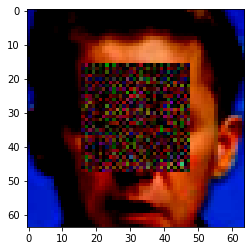

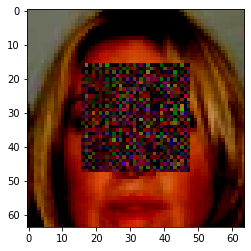

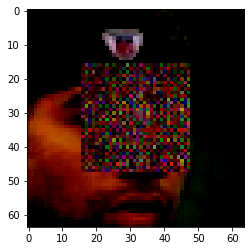

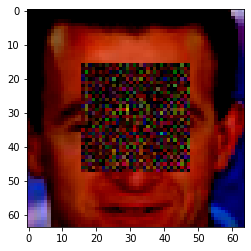

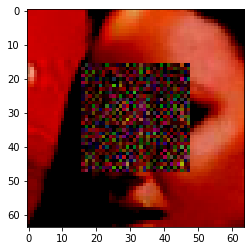

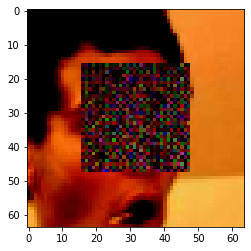

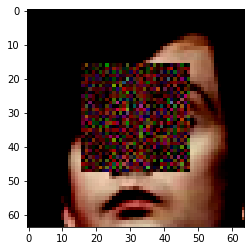

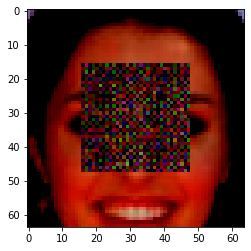

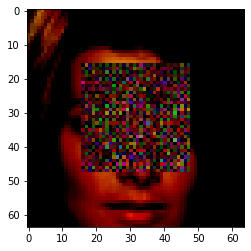

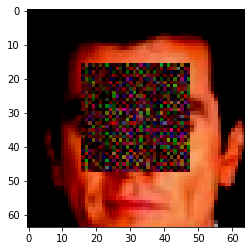

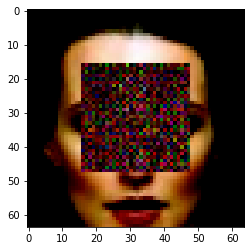

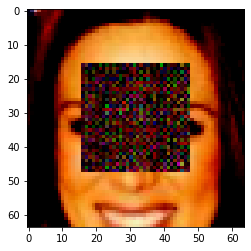

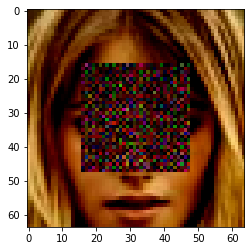

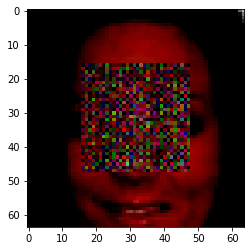

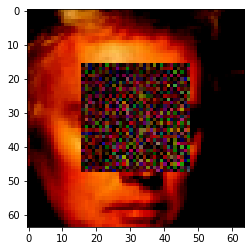

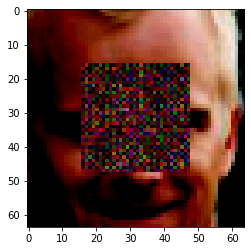

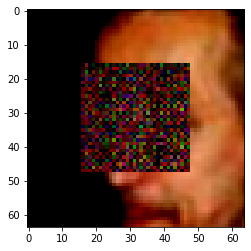

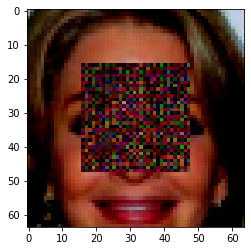

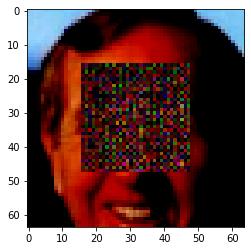

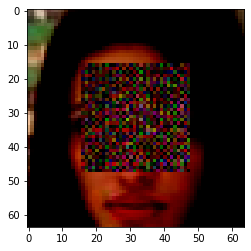

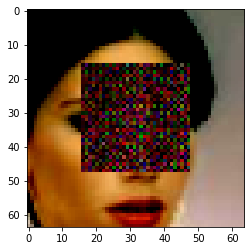

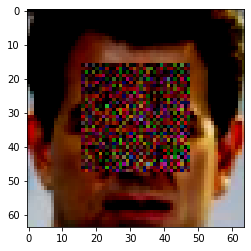

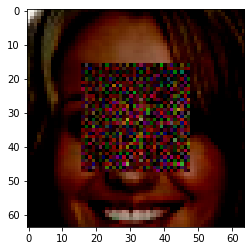

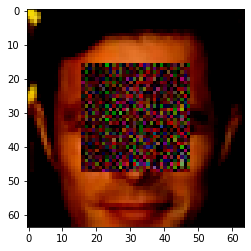

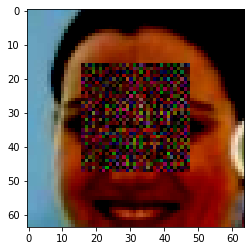

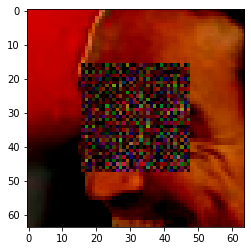

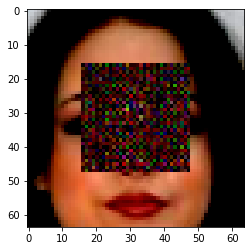

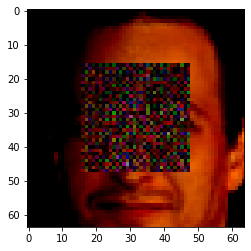

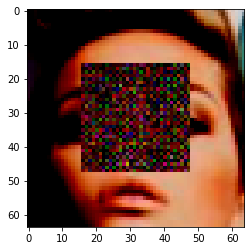

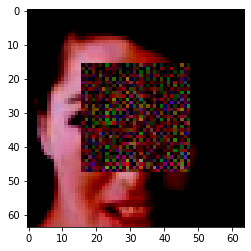

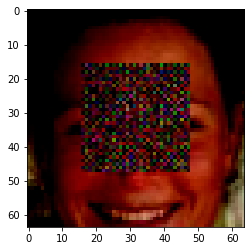

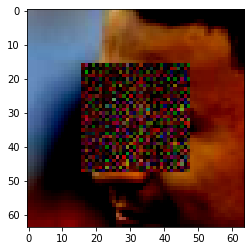

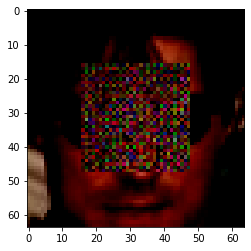

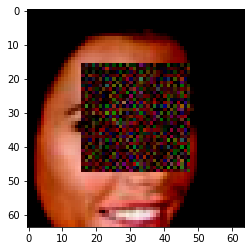

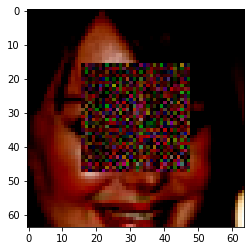

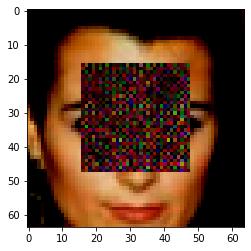

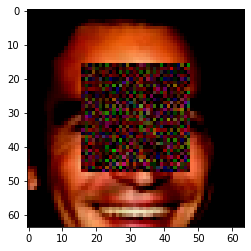

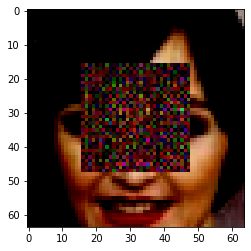

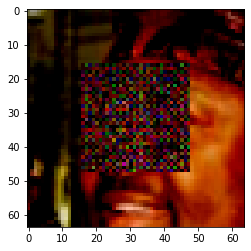

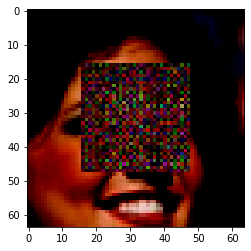

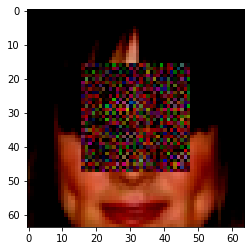

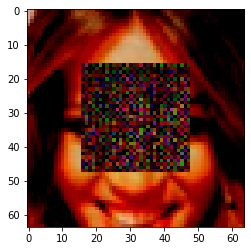

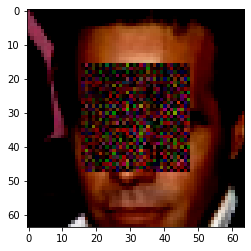

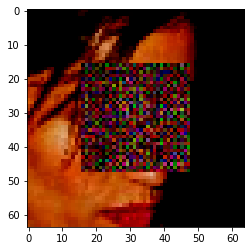

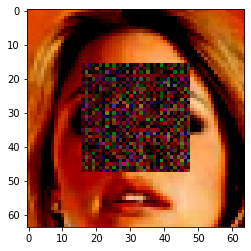

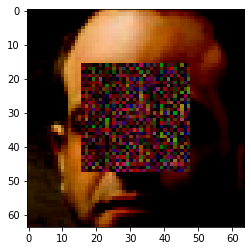

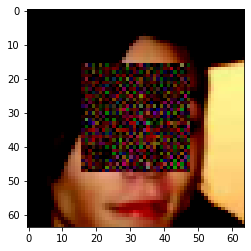

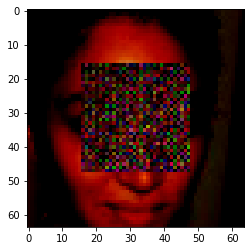

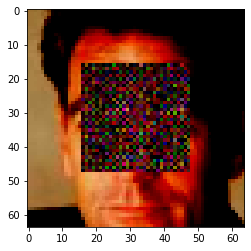

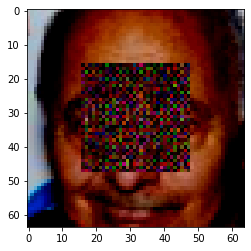

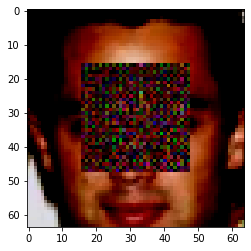

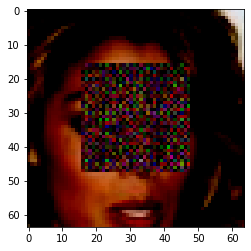

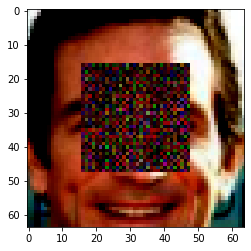

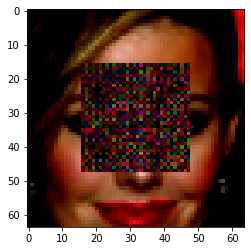

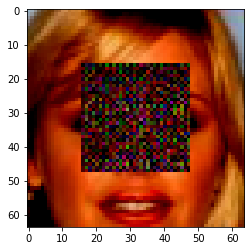

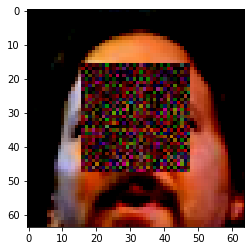

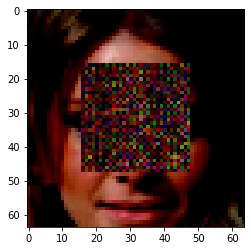

In [ ]:
with tf.compat.v1.Session() as sess:
  graph = tf.get_default_graph()
  saver = tf.compat.v1.train.import_meta_graph('/content/drive/MyDrive/model_recon/Model.cpkt.meta')
  saver.restore(sess,tf.train.latest_checkpoint('/content/drive/MyDrive/model_recon/'))
  
  images=graph.get_tensor_by_name('real_images:0')
  z=graph.get_tensor_by_name("z:0")
  g=graph.get_tensor_by_name("Gen:0")

  sample_generated=sess.run([g],feed_dict={z:sample_z,images:sample_images})
  original_part=np.multiply(sample_images,mask_)
  generated_part=np.multiply(sample_generated,imask_)
  total=np.add(original_part,generated_part)
  
  for i in range(0,63):
    plt.imshow(np.array(total[0][i]), interpolation='nearest')
    plt.show()
